### Imports

In [0]:
import torch.nn as nn
import torch
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
from PIL import Image
import random
import json

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Set Parameters here

In [0]:
test_size = 0.15
learning_rate = 0.01
epochs = 25
batch_size = 16

In [0]:
def extract_features(path):
    img = Image.open(path)
    return (np.array(img))

### Load Dataset

In [0]:
def gen_dataset():
  data=[]
  labels = []
  samples = 0
  imagePaths = sorted(list(paths.list_images('/content/drive/My Drive/dataset_uiuc/')))
  random.seed(42)
  random.shuffle(imagePaths)
  print (imagePaths)
  for imagePath in imagePaths:
    print (imagePath)
    data.append([extract_features(imagePath)])
    labels.append(int(imagePath.split('/')[-2].split('T')[-1]))
  return (data,labels)  

In [0]:
images,labels = gen_dataset()
print (len(images))

['/content/drive/My Drive/dataset_uiuc/T20/T20_01.jpg', '/content/drive/My Drive/dataset_uiuc/T11/T11_03.jpg', '/content/drive/My Drive/dataset_uiuc/T03/T03_02.jpg', '/content/drive/My Drive/dataset_uiuc/T17/T17_25.jpg', '/content/drive/My Drive/dataset_uiuc/T13/T13_27.jpg', '/content/drive/My Drive/dataset_uiuc/T01/T01_13.jpg', '/content/drive/My Drive/dataset_uiuc/T02/T02_08.jpg', '/content/drive/My Drive/dataset_uiuc/T11/T11_26.jpg', '/content/drive/My Drive/dataset_uiuc/T03/T03_14.jpg', '/content/drive/My Drive/dataset_uiuc/T07/T07_22.jpg', '/content/drive/My Drive/dataset_uiuc/T22/T22_40.jpg', '/content/drive/My Drive/dataset_uiuc/T11/T11_18.jpg', '/content/drive/My Drive/dataset_uiuc/T25/T25_22.jpg', '/content/drive/My Drive/dataset_uiuc/T15/T15_32.jpg', '/content/drive/My Drive/dataset_uiuc/T08/T08_24.jpg', '/content/drive/My Drive/dataset_uiuc/T07/T07_31.jpg', '/content/drive/My Drive/dataset_uiuc/T17/T17_31.jpg', '/content/drive/My Drive/dataset_uiuc/T18/T18_30.jpg', '/content

In [0]:
data_dict = {}
data_dict["images"] = images
data_dict["labels"] = labels
with open( "/content/drive/My Drive/dataset_uiuc.pkl", "wb") as handle:
    pickle.dump(data_dict, handle)


In [0]:
with open("/content/drive/My Drive/dataset_uiuc.pkl", "rb") as handle:
    data_dict = pickle.load(handle)

In [0]:
images, labels = data_dict["images"], data_dict["labels"]
images = np.array(images)
labels = np.array(labels)
print("Images Info : ",images.shape)
print("Labels Info : ", labels.shape)

Images Info :  (1000, 1, 480, 640)
Labels Info :  (1000,)


### Read Labels Map

### Split data for training and testing 

In [0]:
train_x, test_x, train_y, test_y = train_test_split(images, labels, test_size=test_size, shuffle=True)
print("Training Images : ", train_x.shape)
print("Testing Images : ", test_x.shape)
print("Training Labels : ", train_y.shape)
print("Testing Labels : ", test_y.shape)

AttributeError: ignored

### Convolutional Neural Network

In [0]:
class ConvNet(nn.Module):
    
    def __init__(self, input_img_size, num_classes):
        super(ConvNet, self).__init__()
        
        self.image_in_size = input_img_size
        self.num_classes = num_classes
        
        # in_channels, out_channels, kernel_size, stride, padding - conv2d
        # kernel_size, stride - avg pool, stride = None (kerne size)
        self.conv1 = nn.Conv2d(1, 32, (3,3), 1)
        self.pool1 = nn.MaxPool2d((2, 2))
        self.conv2 = nn.Conv2d(32, 32, (2,2), 1)
        self.pool2 = nn.MaxPool2d((2, 2))
        self.conv3 = nn.Conv2d(32, 64, (2,2), 2, 1)
        self.pool3 = nn.MaxPool2d((2,2))
        
        self.activation = nn.ReLU()
        
        # in_features, out_features
        self.fc1 = nn.Linear(64*30*40, 256)
        self.fc2 = nn.Linear(256, self.num_classes)
    
    def forward(self, x, bsize):
        
        x = x.view(bsize, 1, 640, 480)
        conv_out = self.activation(self.conv1(x))
        conv_out = self.pool1(conv_out)
        conv_out = self.activation(self.conv2(conv_out))
        conv_out = self.pool2(conv_out)
        conv_out = self.activation(self.conv3(conv_out))
        conv_out = self.pool3(conv_out)
        
        fc_out = self.activation(self.fc1(conv_out.view(bsize, -1)))
        fc_out = self.fc2(fc_out)
        
        return fc_out

In [0]:
class ConvNet(nn.Module):
    
    def __init__(self, input_img_size, num_classes):
        super(ConvNet, self).__init__()
        
        self.image_in_size = input_img_size
        self.num_classes = num_classes
        
        # in_channels, out_channels, kernel_size, stride, padding - conv2d
        # kernel_size, stride - avg pool, stride = None (kerne size)
        self.conv1 = nn.Conv2d(1, 32, (3,3), 1)
        self.pool1 = nn.MaxPool2d((2, 2))
        self.conv2 = nn.Conv2d(32, 32, (2,2), 1)
        self.pool2 = nn.MaxPool2d((2, 2))
        self.conv3 = nn.Conv2d(32, 64, (2,2), 2, 1)
        self.pool3 = nn.MaxPool2d((2,2))
        
        self.activation = nn.ReLU()
        
        # in_features, out_features
        self.fc1 = nn.Linear(64*30*40, 256)
        self.fc2 = nn.Linear(256, self.num_classes)
    
    def forward(self, x, bsize):
        x = x.view(bsize, 1, self.image_in_size[1], self.image_in_size[2])
        conv_out = self.activation(self.conv1(x))
        conv_out = self.pool1(conv_out)
        conv_out = self.activation(self.conv2(conv_out))
        conv_out = self.pool2(conv_out)
        conv_out = self.activation(self.conv3(conv_out))
        conv_out = self.pool3(conv_out)
#         print (conv_out.shape)
#         exit(0)
        fc_out = self.activation(self.fc1(conv_out.view(bsize,-1)))
#         print(conv_out.view(,-1))
        fc_out = self.fc2(fc_out) 
        return fc_out

### Model and Data Prep.

In [0]:
model = ConvNet(np.array(train_x[0]).shape, np.unique(train_y).shape[0])
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [0]:
print (model)

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (activation): ReLU()
  (fc1): Linear(in_features=76800, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=25, bias=True)
)


### Training Loop

In [0]:
train_x = np.array(train_x)
for epoch in range(0, epochs):
    
    # Set model to training mode
    model = model.train()
    
    shuffled_indexes = np.arange(0, train_x.shape[0])
    np.random.shuffle(shuffled_indexes)
    
    num_iters = int(shuffled_indexes.shape[0]/batch_size)
    index = 0
    total_loss = 0.0
    
    for __iter__ in range(0, num_iters):
        train_images_batch = np.take(train_x, shuffled_indexes[index:index+batch_size], axis=0)
        train_labels_batch = np.take(train_y, shuffled_indexes[index:index+batch_size], axis=0)
        
        torch_train_x = torch.from_numpy(train_images_batch).float()
        torch_train_y = torch.from_numpy(train_labels_batch).long()
        
        #print(torch_train_x.size(), torch_train_y.size())
        model_out = model.forward(torch_train_x, bsize=torch_train_x.size()[0])
        
        loss = criterion(model_out, torch_train_y)
        
        total_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        del torch_train_x
        del torch_train_y
    
    
    # Test Mode
    
    model = model.eval()
    
    with torch.no_grad():
        torch_test_x = torch.from_numpy(nparray(test_x)).float()
        torch_test_y = torch.from_numpy(np.array(test_y)).long()
        test_model_out = model.forward(torch_test_x, bsize=torch_test_x.size()[0])
        test_loss = criterion(test_model_out, torch_test_y)
    
    print("Epoch : %d, Train Loss : %.4f, Test Loss : %.4f"%(epoch+1, total_loss/num_iters, test_loss.item()))

In [0]:
export CUDA_LAUNCH_BLOCKING = 1

SyntaxError: ignored

### Save trained model weights

In [0]:
torch.save(model.state_dict(), "weights.torch")

### Calculate Prediction Accuracy

In [0]:
model = model.eval()

with torch.no_grad():
    torch_test_x = torch.from_numpy(test_x).float().cuda()
    torch_test_y = torch.from_numpy(test_y).long().cuda()
    test_model_out = model.forward(torch_test_x, bsize=torch_test_x.size()[0])

In [0]:
bool_tensor = torch_test_y == test_model_out.argmax(dim=1)
correct_count = bool_tensor.sum().float().div(bool_tensor.size()[0])
print("Prediction Accuracy : %.4f"%(correct_count.item()*100))

Prediction Accuracy : 97.5000


### Some Sample Predictions

In [0]:
predicted_labels = test_model_out.argmax(dim=1)

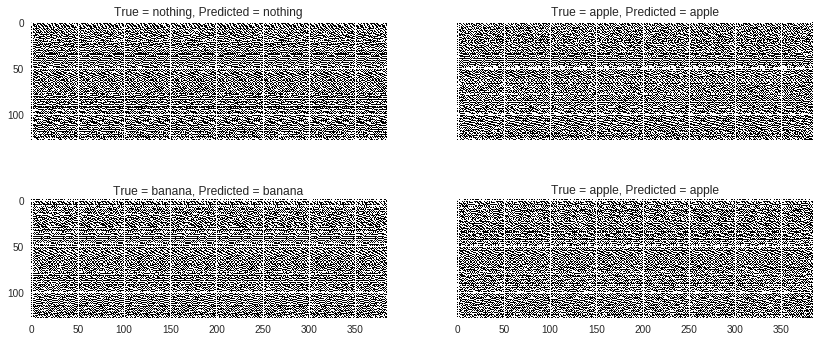

In [0]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(14,6))
random_indexes = np.random.randint(0, torch_test_x.size()[0], size=(4,))
#print(random_indexes)
ax1.imshow(torch_test_x[random_indexes[0]].cpu().numpy(), cmap="gray")
#print(labels_encoding[str(torch_test_y[random_indexes[0]].item())])
title = "True = %s, Predicted = %s"%(labels_encoding[str(torch_test_y[random_indexes[0]].item())], labels_encoding[str(predicted_labels[random_indexes[0]].item())])
ax1.set_title(title)

ax2.imshow(torch_test_x[random_indexes[1]].cpu().numpy(), cmap="gray")
#print(labels_encoding[str(torch_test_y[random_indexes[1]].item())])
title = "True = %s, Predicted = %s"%(labels_encoding[str(torch_test_y[random_indexes[1]].item())], labels_encoding[str(predicted_labels[random_indexes[1]].item())])
ax2.set_title(title)

ax3.imshow(torch_test_x[random_indexes[2]].cpu().numpy(), cmap="gray")
#print(labels_encoding[str(torch_test_y[random_indexes[2]].item())])
title = "True = %s, Predicted = %s"%(labels_encoding[str(torch_test_y[random_indexes[2]].item())], labels_encoding[str(predicted_labels[random_indexes[2]].item())])
ax3.set_title(title)

ax4.imshow(torch_test_x[random_indexes[3]].cpu().numpy(), cmap="gray")
#print(labels_encoding[str(torch_test_y[random_indexes[3]].item())])
title = "True = %s, Predicted = %s"%(labels_encoding[str(torch_test_y[random_indexes[3]].item())], labels_encoding[str(predicted_labels[random_indexes[3]].item())])
ax4.set_title(title)
plt.show()